In [1]:
import pandas as pd
import numpy as np
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy import interpolate
import seaborn as sns
import time
from datetime import datetime
%matplotlib inline


In [2]:
POI = 'cgreGFP' # protein of interest

In [3]:
%run ./asm00_fitting_functions.ipynb

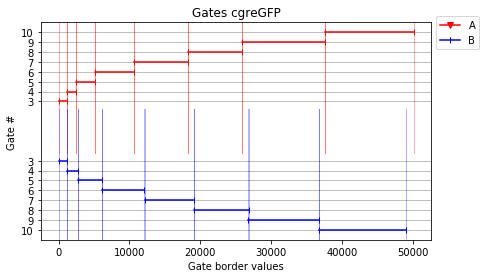

In [4]:
gates_dict = get_gates_dict(POI)
gates_positions_figure(gates_dict)
d = pd.read_csv(f"../../data/{POI}/{POI}_06_hiseq_working_data.txt",delimiter='\t')

## Sanity check with control barcodes

In [ ]:
bc_controls['custom'] = ['AACCCATTATGCTCAACCAT','ACCCCCACCCACCCAAAACC']

plt.close('all')
# for bc in ['cgre','av','pplu','amac']:#,'custom']:
for bc in bc_controls.keys():
    
    sanity_wt = bc_controls[bc]
    sanity_wt_df = d[d.primary_bc.isin(sanity_wt)]
    f_sanity_wt = fit_job(sanity_wt_df,gates_dict)
    f_sanity_wt_df = pd.DataFrame.from_records(f_sanity_wt,index='original_index')
    sanity0 = sanity_wt_df.join(f_sanity_wt_df)
    demoplot(f_sanity_wt,sanity0,gates_dict,f'{POI} data, bc: {bc}')

## Sanity check: fitting small sample

In [6]:
sel0 = d.sample(1000)
# sel0 = d
fit_job_result = fit_job(sel0,gates_dict)
fit_job_result_df = pd.DataFrame.from_records(fit_job_result,index='original_index')
sel0_and_fit_df = sel0.join(fit_job_result_df)

In [7]:
import random

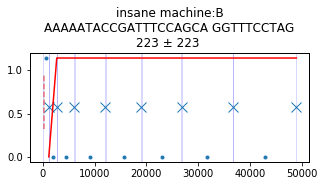

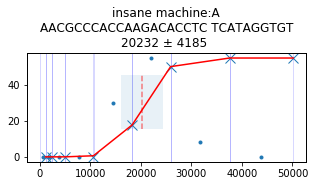

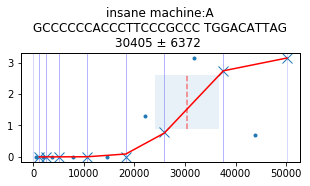

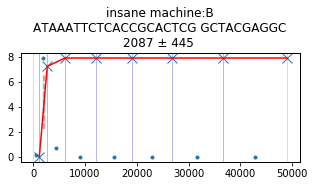

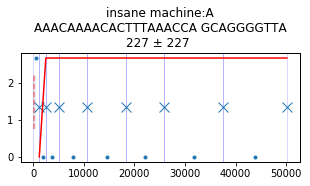

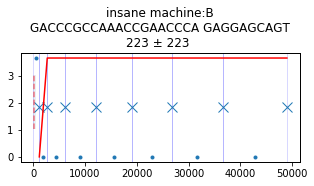

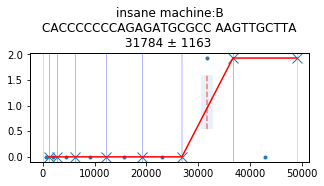

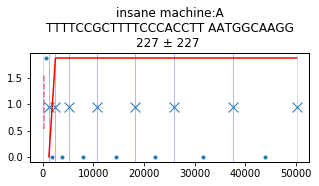

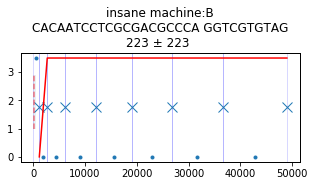

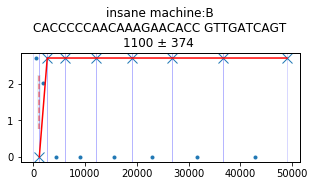

In [8]:
demoplot(random.sample(fit_job_result,10),sel0,gates_dict,'insane')

## Fitting all

In [9]:
start_ = datetime.today().strftime('%Y%m%d-%H%M%S')

sel0 = d
# sel0 = d
fit_job_result = fit_job(sel0,gates_dict)
fit_job_result_df = pd.DataFrame.from_records(fit_job_result,index='original_index')
sel0_and_fit_df = sel0.join(fit_job_result_df)
stop_ = datetime.today().strftime('%Y%m%d-%H%M%S')


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
sel0_and_fit_df.to_csv(f"{POI}_cdf_fitting_{stop_}.csv.gz",index=False)

In [103]:
#%run ../louisa/_get_folder_IDs.ipynb
%run ./lgs01a_functions_for_getting_aa_pseudopositions.ipynb

In [116]:
ssu = sel0_and_fit_df
gb = ssu.groupby(['primary_bc','secondary_bc'])

i=0
res = []
for name,group in log_progress(gb,every=100,size=gb.ngroups):

    if group.shape[0]>1:
        r = {}
        r['primary_bc'] = name[0]
        r['secondary_bc'] = name[1]

        for row_index, row in group.iterrows():
            r[f'{row["machine"]}_mu'] = row['mu']
            r[f'{row["machine"]}_sigma'] = row['sigma']
            r[f'{row["machine"]}_pmu'] = row['pmu']
            r[f'{row["machine"]}_psigma'] = row['psigma']
            r[f'{row["machine"]}_nreads'] = np.sum(row[gates])


            pass
        res.append(r)

In [11]:
ssu = sel0_and_fit_df
gb = ssu.groupby(['primary_bc','secondary_bc'])
i=0
res = []
for name,group in log_progress(gb,every=100,size=gb.ngroups):
   
    if group.shape[0]>1:
        r = {}
        r['primary_bc'] = name[0]
        r['secondary_bc'] = name[1]

        for row_index, row in group.iterrows():
            r[f'{row["machine"]}_mu'] = row['mu']
            r[f'{row["machine"]}_sigma'] = row['sigma']
            r[f'{row["machine"]}_pmu'] = row['pmu']
            r[f'{row["machine"]}_psigma'] = row['psigma']
            r[f'{row["machine"]}_nreads'] = np.sum(row[gates]            

            pass
        res.append(r)

In [ ]:
resdf = pd.DataFrame.from_records(res)
resdf.to_csv("cgreGFP_cdf_fitting_AB_20200329-061344.csv.gz")